In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil import tz
import statsmodels.api as sm
import seaborn as sns
import statsmodels.graphics.tsaplots as tsa

In [313]:
raw = pd.read_csv("all_data_hourly.csv")
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,5/1/21 4:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,5/1/21 4:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,5/1/21 4:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/1/21 4:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/1/21 4:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,5/2/23 3:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,5/2/23 3:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,5/2/23 3:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,5/2/23 3:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [314]:
raw["slottime_GMT"] = raw["slottime_GMT"].apply(lambda x: datetime.strptime(x, "%m/%d/%y %H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
raw

,name,slottime_GMT,slottype,slotavg,pointTitle
0,Campus.CW.TONS,2021-05-01 00:00:00-04:00,H,2451.879750,Total Chilled Water
1,Campus.Elec.Demand_MW,2021-05-01 00:00:00-04:00,H,21.180990,Total Campus Electric Demand
2,Campus.STM.Flow,2021-05-01 00:00:00-04:00,H,147.684086,Total Steam Flow
3,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2021-05-01 00:00:00-04:00,H,15.075800,Process Cooler 3 inch Chilled Water
4,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2021-05-01 00:00:00-04:00,H,6.732450,Sample Cooler Chilled Water
...,...,...,...,...,...
130690,CentralEnergyPlant.CW.ProcessCooler3inch.FP/TONS,2023-05-01 23:00:00-04:00,H,30.334750,Process Cooler 3 inch Chilled Water
130691,CentralEnergyPlant.CW.SampleCooler.FP/TONS,2023-05-01 23:00:00-04:00,H,3.059270,Sample Cooler Chilled Water
130692,CentralEnergyPlant.GTG1-2.PROCESS.CW.FP/TONS,2023-05-01 23:00:00-04:00,H,184.149750,GTG 1 and 2 Process Chilled Water
130693,CentralEnergyPlant.GTG1-2.TurbineIntakeAir.CW....,2023-05-01 23:00:00-04:00,H,0.050382,GTG 1 and 2 Turbine Intake Air Chilled Water


In [315]:
weather = pd.read_csv("weather_hourly.csv")
weather

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
0,2021-05-01T00:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,...,77,50,53,1,35,16,19,133.5,16.8,27.8
1,2021-05-01T01:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,...,100,63,64,17,0,0,0,0.0,16.5,27.3
2,2021-05-01T02:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,...,100,61,97,90,0,0,0,0.0,16.2,26.9
3,2021-05-01T03:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,...,100,94,100,74,0,0,0,0.0,14.6,24.3
4,2021-05-01T04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2023-05-01T19:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,56,32,18,54,522,257,265,314.4,13.4,20.5
17540,2023-05-01T20:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,44,9,31,57,496,264,232,326.5,12.1,18.2
17541,2023-05-01T21:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,44,18,25,41,448,263,185,387.8,11.0,16.8
17542,2023-05-01T22:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,81,24,66,67,357,237,120,484.1,7.2,12.0


In [316]:
weather["time"] = weather["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
weather = weather.set_index("time")
weather

,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),weathercode (wmo code),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h)
time,,,,,,,,,,,,,,,,,,,,
2021-04-30 20:00:00-04:00,42.0,68,32.2,31.1,1008.0,973.4,0.000,0.000,0.000,2,77,50,53,1,35,16,19,133.5,16.8,27.8
2021-04-30 21:00:00-04:00,40.4,71,31.6,29.5,1009.3,974.5,0.004,0.004,0.000,51,100,63,64,17,0,0,0,0.0,16.5,27.3
2021-04-30 22:00:00-04:00,39.3,75,31.9,28.6,1010.2,975.3,0.008,0.008,0.000,51,100,61,97,90,0,0,0,0.0,16.2,26.9
2021-04-30 23:00:00-04:00,38.1,77,31.6,28.1,1011.1,976.1,0.008,0.008,0.000,51,100,94,100,74,0,0,0,0.0,14.6,24.3
2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,71,100,99,98,50,0,0,0,0.0,13.2,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,51,56,32,18,54,522,257,265,314.4,13.4,20.5
2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,53,44,9,31,57,496,264,232,326.5,12.1,18.2
2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,51,44,18,25,41,448,263,185,387.8,11.0,16.8


In [317]:
chilled_water = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Chilled Water"]
chilled_water.columns = ["time", "chilled_water"]
chilled_water = chilled_water.set_index("time")
display(chilled_water)

steam = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Steam Flow"]
steam.columns = ["time", "steam"]
steam = steam.set_index("time")
display(steam)

electricity = raw[["slottime_GMT", "slotavg"]][raw["pointTitle"] == "Total Campus Electric Demand"]
electricity.columns = ["time", "electricity"]
electricity = electricity.set_index("time")
display(electricity)

# data = pd.concat([chilled_water, steam, electricity], axis=1, join="inner")
# display(data)

,chilled_water
time,
2021-05-01 00:00:00-04:00,2451.87975
2021-05-01 01:00:00-04:00,2385.74125
2021-05-01 02:00:00-04:00,2314.83125
2021-05-01 03:00:00-04:00,2319.18375
2021-05-01 04:00:00-04:00,2361.69675
...,...
2023-05-01 19:00:00-04:00,2980.17150
2023-05-01 20:00:00-04:00,2830.65875
2023-05-01 21:00:00-04:00,2796.19950


,steam
time,
2021-05-01 00:00:00-04:00,147.684086
2021-05-01 01:00:00-04:00,147.614200
2021-05-01 02:00:00-04:00,151.649156
2021-05-01 03:00:00-04:00,147.774962
2021-05-01 04:00:00-04:00,150.348843
...,...
2023-05-01 19:00:00-04:00,123.162225
2023-05-01 20:00:00-04:00,128.566650
2023-05-01 21:00:00-04:00,126.427325


,electricity
time,
2021-05-01 00:00:00-04:00,21.180990
2021-05-01 01:00:00-04:00,21.046370
2021-05-01 02:00:00-04:00,20.794573
2021-05-01 03:00:00-04:00,20.755208
2021-05-01 04:00:00-04:00,20.699110
...,...
2023-05-01 19:00:00-04:00,25.738350
2023-05-01 20:00:00-04:00,25.189815
2023-05-01 21:00:00-04:00,24.451785


In [318]:
df = weather.join([chilled_water, steam, electricity], how="inner").reset_index()
df

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


In [319]:
# df["hour"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()).hour)
# df["time"] = df["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").replace(tzinfo=tz.tzutc()).astimezone(tz.tzlocal()))
df = df[(df["chilled_water"] > 0) & (df["steam"] > 0) & (df["electricity"] > 0)]
# mean, std =  np.mean(df['chilled_water']), np.std(df['chilled_water'])
# df = df[(df['chilled_water']>(mean-3*std)) & (df['chilled_water']<(mean+3*std))]
df = df.dropna()
display(df)

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,cloudcover_high (%),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,50,0,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,8,0,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,54,522,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,57,496,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,41,448,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,67,357,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255


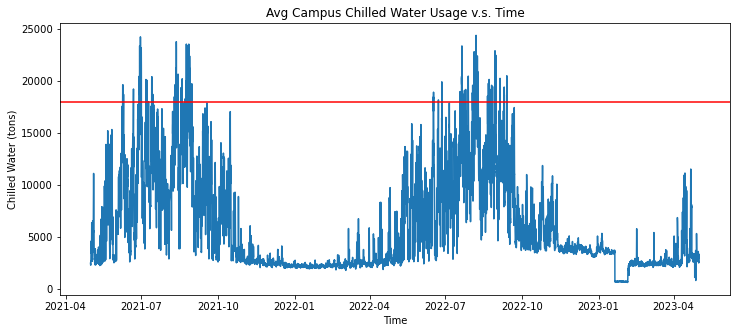

In [320]:
plt.figure(figsize = (12, 5))
plt.plot(df["time"], df["chilled_water"])
plt.title("Avg Campus Chilled Water Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Chilled Water (tons)")
plt.axhline(y = 18000, color = 'r', linestyle = '-')

Text(0, 0.5, 'Steam (Klbs/hr)')

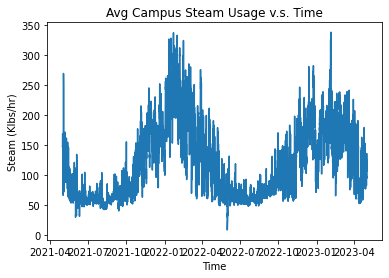

In [321]:
plt.plot(df["time"], df["steam"])
plt.title("Avg Campus Steam Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Steam (Klbs/hr)")

Text(0, 0.5, 'Electricity (MW)')

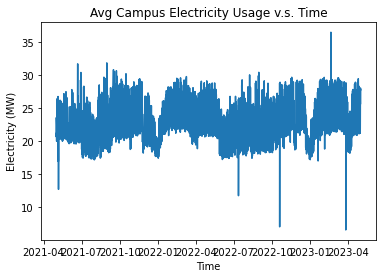

In [322]:
plt.plot(df["time"], df["electricity"])
plt.title("Avg Campus Electricity Usage v.s. Time")
plt.xlabel("Time")
plt.ylabel("Electricity (MW)")

In [323]:
X = df[["temperature_2m (°F)", "relativehumidity_2m (%)", "dewpoint_2m (°F)", "apparent_temperature (°F)", "pressure_msl (hPa)", "surface_pressure (hPa)", "precipitation (inch)", "rain (inch)", "snowfall (inch)", "cloudcover (%)", "cloudcover_low (%)", "cloudcover_mid (%)", "cloudcover_high (%)", "shortwave_radiation (W/m²)", "direct_radiation (W/m²)", "diffuse_radiation (W/m²)", "direct_normal_irradiance (W/m²)", "windspeed_10m (mp/h)", "windspeed_100m (mp/h)"]]
Y = df["chilled_water"]

X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

# plt.scatter(X["temperature_2m (°F)"], Y)
# plt.plot(X["temperature_2m (°F)"], predictions, c="red")
# plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
# plt.xlabel("Outdoor Temperature (°F)")
# plt.ylabel("Chilled Water (tons)")
# plt.show()

model_q1.summary()

0        2261.570251
1        1787.226625
2        1656.484098
3        1893.312722
4        1760.501646
            ...     
17406    3324.255280
17407    3356.017366
17408    2671.783306
17409    3242.297504
17410    4245.153856
Length: 17353, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     7331.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        13:18:48   Log-Likelihood:            -1.5273e+05
No. Observations:               17353   AIC:                         3.055e+05
Df Residuals:                   17334   BIC:                         3.057e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -3.648e+04   2373.004    -15.372      0.000   -4.11e+04   -3.18e+04
temperature_2m (°F)              -391.5644     28.984    -13.510      0.000    -448.376    -334.753
relativehumidity_2m (%)             7.6575      4.946      1.548      0.122      -2.037      17.352
dewpoint_2m (°F)                 -230.2795     13.558    -16.985      0.000    -256.854    -203.705
apparent_temperature (°F)        1204.7301     13.005     92.638      0.000    1179.240    1230.220
pressure_msl (hPa)               9446.5500    267.220     35.351      0.000    8922.772    9970.328
surface_pressure (hPa)          -9766.1782    276.651    -35.301      0.000   -1.03e+04   -9223.914
precipitation (inch)            -8815.5168   7.14e+04     -0.124      0.902   -1.49e+05    1.31e+05
rain (inch)                      8097.1063   7.14e+04      0.113      0.910   -1.32e+05    1.48e+05
snowfall (inch)                  4859.1635   1.02e+04      0.477      0.633   -1.51e+04    2.48e+04
cloudcover (%)                      7.2742      1.125      6.463      0.000       5.068       9.480
cloudcover_low (%)                 -3.3802      0.825     -4.099      0.000      -4.996      -1.764
cloudcover_mid (%)                 -1.7233      0.631     -2.732      0.006      -2.960      -0.487
cloudcover_high (%)                -3.7183      0.405     -9.180      0.000      -4.512      -2.924
shortwave_radiation (W/m²)         -1.1233      0.093    -12.083      0.000      -1.306      -0.941
direct_radiation (W/m²)            -4.7559      0.161    -29.554      0.000      -5.071      -4.440
diffuse_radiation (W/m²)            3.6325      0.170     21.408      0.000       3.300       3.965
direct_normal_irradiance (W/m²)     2.1049      0.124     16.932      0.000       1.861       2.349
windspeed_10m (mp/h)              615.8583     17.208     35.789      0.000     582.129     649.588
windspeed_100m (mp/h)             -55.5437      9.680     -5.738      0.000     -74.518     -36.570
==============================================================================
Omnibus:                     1687.963   Durbin-Watson:                   0.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5132.079
Skew:                           0.515   Prob(JB):                         0.00
Kurtosis:                       5.457   Cond. No.                     2.83e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.53e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [324]:
df["temperature_2m (°F)^2"] = np.power(df["temperature_2m (°F)"], 2)
df["temperature_2m (°F)^3"] = np.power(df["temperature_2m (°F)"], 3)
df

,time,temperature_2m (°F),relativehumidity_2m (%),dewpoint_2m (°F),apparent_temperature (°F),pressure_msl (hPa),surface_pressure (hPa),precipitation (inch),rain (inch),snowfall (inch),...,direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),windspeed_10m (mp/h),windspeed_100m (mp/h),chilled_water,steam,electricity,temperature_2m (°F)^2,temperature_2m (°F)^3
0,2021-05-01 00:00:00-04:00,37.4,77,30.9,27.8,1011.7,976.6,0.008,0.004,0.028,...,0,0,0.0,13.2,22.9,2451.87975,147.684086,21.180990,1398.76,52313.624
1,2021-05-01 01:00:00-04:00,37.0,76,30.1,27.4,1012.5,977.4,0.004,0.000,0.028,...,0,0,0.0,13.0,25.2,2385.74125,147.614200,21.046370,1369.00,50653.000
2,2021-05-01 02:00:00-04:00,37.0,74,29.6,26.7,1013.3,978.2,0.000,0.000,0.000,...,0,0,0.0,14.6,25.6,2314.83125,151.649156,20.794573,1369.00,50653.000
3,2021-05-01 03:00:00-04:00,36.4,85,32.3,27.5,1014.0,978.8,0.000,0.000,0.000,...,0,0,0.0,12.2,20.8,2319.18375,147.774962,20.755208,1324.96,48228.544
4,2021-05-01 04:00:00-04:00,36.8,83,32.0,28.3,1014.9,979.7,0.000,0.000,0.000,...,0,0,0.0,10.9,19.5,2361.69675,150.348843,20.699110,1354.24,49836.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17406,2023-05-01 15:00:00-04:00,53.2,60,39.7,45.1,989.4,956.2,0.016,0.016,0.000,...,257,265,314.4,13.4,20.5,3289.04225,106.263122,27.715608,2830.24,150568.768
17407,2023-05-01 16:00:00-04:00,49.9,63,37.8,42.0,989.7,956.2,0.024,0.024,0.000,...,264,232,326.5,12.1,18.2,3060.91725,124.254375,28.095195,2490.01,124251.499
17408,2023-05-01 17:00:00-04:00,49.3,68,39.2,42.1,990.4,956.9,0.008,0.008,0.000,...,263,185,387.8,11.0,16.8,3036.43975,108.202820,26.360443,2430.49,119823.157
17409,2023-05-01 18:00:00-04:00,50.2,63,37.9,44.3,991.0,957.5,0.004,0.004,0.000,...,237,120,484.1,7.2,12.0,3170.22075,111.019855,26.238255,2520.04,126506.008


0        4791.820307
1        4740.570892
2        4740.570892
3        4663.696769
4        4714.946184
            ...     
17406    6816.172201
17407    6393.364527
17408    6316.490404
17409    6431.801588
17410    6354.927466
Length: 17353, dtype: float64


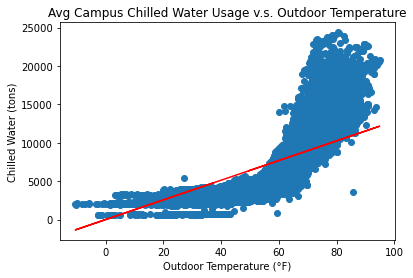

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          chilled_water   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          8.999e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):                        0.00
Time:                        13:18:49   Log-Likelihood:                     -1.6408e+05
No. Observations:               17353   AIC:                                  3.282e+05
Df Residuals:                   17352   BIC:                                  3.282e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
temperature_2m (°F)   128.1235      0.427    299.991      0.000     127.286     128.961
==============================================================================
Omnibus:                     4783.184   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11248.353
Skew:                           1.558   Prob(JB):                         0.00
Kurtosis:                       5.417   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
X = df[["temperature_2m (°F)"]]
# X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_q1.summary()

0        2489.980189
1        2424.233009
2        2424.233009
3        2326.937787
4        2391.624529
            ...     
17406    5652.472570
17407    4900.820586
17408    4769.326226
17409    4967.164263
17410    4834.874574
Length: 17353, dtype: float64


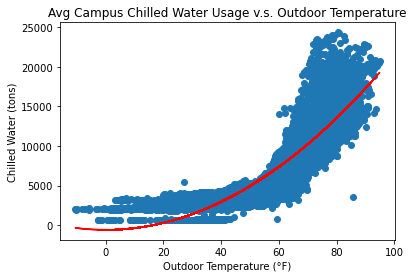

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          chilled_water   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                 6.791e+04
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        13:21:03   Log-Likelihood:            -1.5760e+05
No. Observations:               17353   AIC:                         3.152e+05
Df Residuals:                   17351   BIC:                         3.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -600.2256     30.282    -19.821      0.000    -659.582    -540.869
temperature_2m (°F)^2     2.2092      0.008    260.593      0.000       2.193       2.226
==============================================================================
Omnibus:                     2931.366   Durbin-Watson:                   0.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6538.716
Skew:                           0.984   Prob(JB):                         0.00
Kurtosis:                       5.274   Cond. No.                     6.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [334]:
X = df[["temperature_2m (°F)^2"]]
X = sm.add_constant(X)
model_2 = sm.OLS(Y, X).fit()
predictions = model_2.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_2.summary()

0        1539.892121
1        1491.010365
2        1491.010365
3        1419.644621
4        1466.962278
            ...     
17406    4432.108536
17407    3657.439300
17408    3527.087616
17409    3723.802522
17410    3591.869254
Length: 17353, dtype: float64


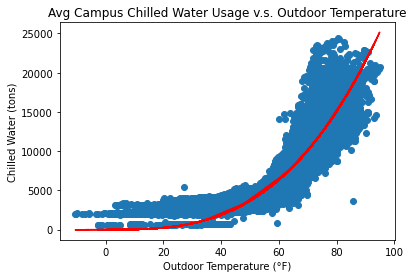

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          chilled_water   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                          2.337e+05
Date:                Tue, 16 May 2023   Prob (F-statistic):                        0.00
Time:                        13:18:49   Log-Likelihood:                     -1.5671e+05
No. Observations:               17353   AIC:                                  3.134e+05
Df Residuals:                   17352   BIC:                                  3.134e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temperature_2m (°F)^3     0.0294   6.09e-05    483.435      0.000       0.029       0.030
==============================================================================
Omnibus:                     1329.289   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5401.372
Skew:                           0.291   Prob(JB):                         0.00
Kurtosis:                       5.671   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [327]:
X = df[["temperature_2m (°F)^3"]]
# X = sm.add_constant(X)
model_q1 = sm.OLS(Y, X).fit()
predictions = model_q1.predict(X)
print(predictions)

plt.scatter(df["temperature_2m (°F)"], Y)
plt.plot(df["temperature_2m (°F)"], predictions, c="red")
plt.title("Avg Campus Chilled Water Usage v.s. Outdoor Temperature")
plt.xlabel("Outdoor Temperature (°F)")
plt.ylabel("Chilled Water (tons)")
plt.show()

model_q1.summary()

/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temperature_2m (°F)^2'>

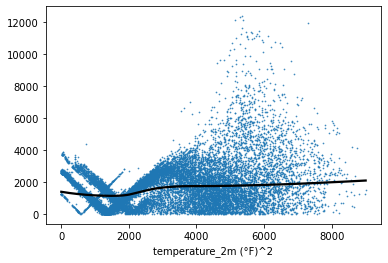

In [335]:
# checking assumptions-- constant variance
x_cubed = X["temperature_2m (°F)^2"]

sns.regplot(x_cubed, abs(model_2.resid), lowess=True, line_kws = {'color': 'black'}, scatter_kws = {'s': 0.5})

/Users/reidfleishman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

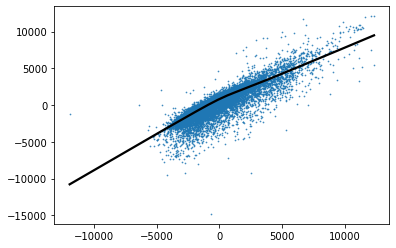

In [336]:
# checking assumptions -- errors are independent
sns.regplot(model_2.resid[: -1], model_q1.resid[1:], lowess = True, line_kws = {'color': 'black'} , scatter_kws = { 's' : 0.5})

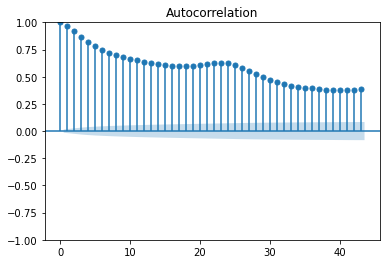

In [337]:
# checking assumptions -- autocorrelation plots

tsa.plot_acf(model_2.resid)
plt.show()

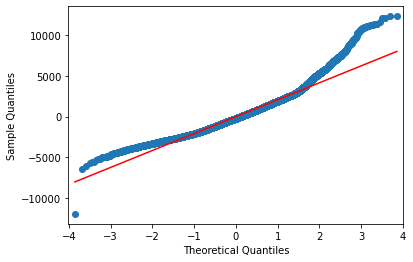

In [338]:
sm.qqplot(model_2.resid , line="r")
plt.show()